In [14]:
!pip3 install --quiet nltk
!pip3 install --quiet sentence-transformers
!pip3 install --quiet contractions
!pip3 install --quiet pandas
!pip install --quiet gensim
!pip install --quiet pyLDAvis
!pip install --quiet spacy
!pip install --quiet requests
!pip install --quiet beautifulsoup4
!pip install --quiet lxml

In [15]:
import requests
import pandas as pd
import bs4 as bs
import urllib.request
import json
import contractions
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from transformers import pipeline
from spacy import displacy
import os
import gensim
import spacy
import gensim.corpora as corpora
from gensim.models import CoherenceModel
import pyLDAvis.gensim_models as gensimvis
from gensim.utils import simple_preprocess
import string
from nltk.stem import WordNetLemmatizer

import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import NMF
import pyLDAvis

In [16]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [17]:
poems_n = pd.read_json("Pushcart_nomination.json")
poems_nn = pd.read_json("Pushcart_Non-nomination.json")


In [18]:
poems_n

,Author,Title,Poem,Year,Poem_for_model,POS,dist_pos,doc_term_matrix
0,Phoebe Bubendorfer,OIL SPILL,A red-throated loon\nmired in a slick of oil\n...,2022,red throated loon mired in slick of oil strain...,"[[[red, JJ]], [[throated, VBN]], [[loon, NN]],...","{'JJ': 2, 'VBN': 2, 'NN': 17, 'CD': 1, 'VBG': ...",4
1,Bill Graeser,THE BURNING OF THE WHALES,Fire never seems to mind\nwhether it's the cur...,2022,fire never seems to mind whether it is the cur...,"[[[fire, NN]], [[never, RB]], [[seems, VBZ]], ...","{'NN': 26, 'RB': 5, 'VBZ': 1, 'IN': 1, 'VBG': ...",4
2,John Mitchell,THE BUFFALO,The buffalo stands still in the wind.\nStaring...,2022,the buffalo stands still in the wind staring a...,"[[[buffalo, NN]], [[stand, NN]], [[still, RB]]...","{'NN': 17, 'RB': 3, 'VBG': 5, 'JJ': 5, 'VBN': 1}",4
3,Lily Nelson,FEVER,You are nine\n Lying on the front room co...,2022,you are nine lying on the front room couch and...,"[[[nine, CD]], [[lying, VBG]], [[front, NN]], ...","{'CD': 1, 'VBG': 6, 'NN': 34, 'IN': 7, 'RB': 2...",4
4,Lucille Morgan Wilson,LISTENING TO DVORAK'S HUMORESQUE,The fingered notes play up and down my spine\n...,2022,the fingered notes play up and down my spine l...,"[[[fingered, VBN]], [[note, NN]], [[play, NN]]...","{'VBN': 2, 'NN': 48, 'IN': 2, 'VBG': 4, 'NNS':...",4
5,Allison Berryhill,SONNET TO MY STUDENTS ON THE FIRST DAY OF CLASS,Come in and make a mess with all your thoughts...,2021,come in and make mess with all your thoughts h...,"[[[come, VB]], [[make, VB]], [[mess, NN]], [[t...","{'VB': 2, 'NN': 45, 'JJ': 3, 'VBG': 2, 'NNS': ...",4
6,Heather Ann Clark,TURTLE SHELLS,My therapist asks what else is on my mind.\n\n...,2021,my therapist asks what else is on my mind pith...,"[[[therapist, NN]], [[asks, NNS]], [[else, RB]...","{'NN': 39, 'NNS': 1, 'RB': 8, 'IN': 1, 'VBG': ...",4
7,Jared Pearce,ILLNESS,It's like waiting for the elevator\ndoors to r...,2021,it is like waiting for the elevator doors to r...,"[[[like, IN]], [[waiting, VBG]], [[elevator, N...","{'IN': 3, 'VBG': 8, 'NN': 27, 'VB': 2, 'JJ': 4...",4
8,Shelly Reed Thieman,ON THE ANNIVERSARY OF ANOTHER WINTER,"Tongue-tied with suet and peanut\nbutter, a qu...",2021,tongue tied with suet and peanut butter quarte...,"[[[tongue, NN]], [[tied, VBN]], [[suet, NN]], ...","{'NN': 45, 'VBN': 2, 'JJ': 2, 'VB': 1, 'RB': 1...",4
9,Erik Trilk,DAZED AND CONFUSED,It won't be long until I'm with the moon\nthis...,2021,it will not be long until am with the moon thi...,"[[[long, RB]], [[moon, NN]], [[summer, NN]], [...","{'RB': 4, 'NN': 50, 'VBN': 6, 'JJ': 6, 'VBG': ...",4


In [19]:
from gensim import matutils, models
import scipy.sparse
# Let's create a function to pull out nouns from a string of text
from nltk import word_tokenize, pos_tag

In [20]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

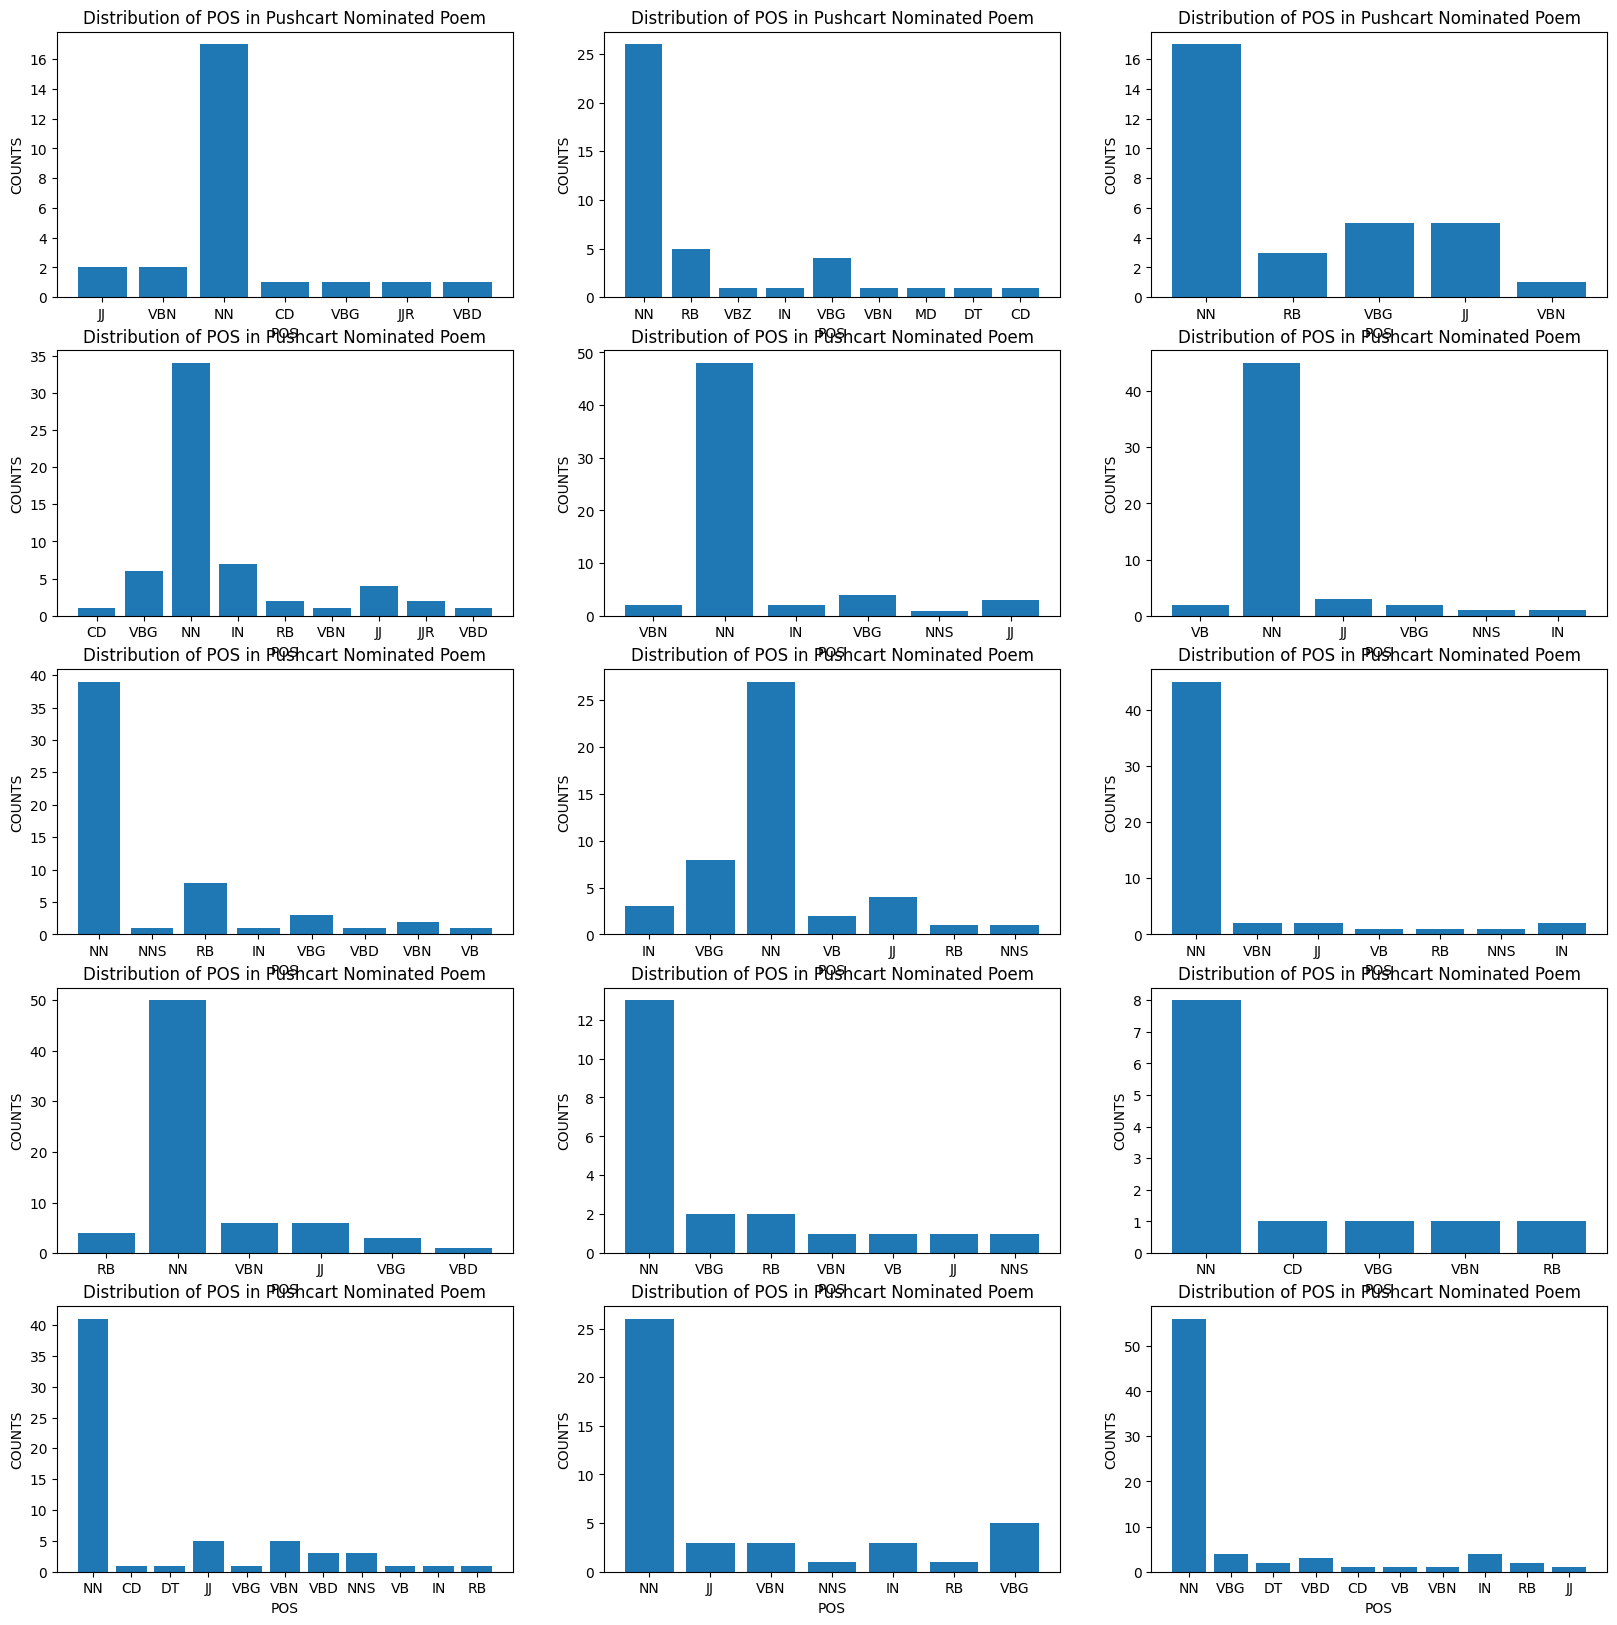

In [21]:
from IPython.display import Image
Image("/workspaces/CMPE257/Pushcart_Nomination_DIST_POS.png")


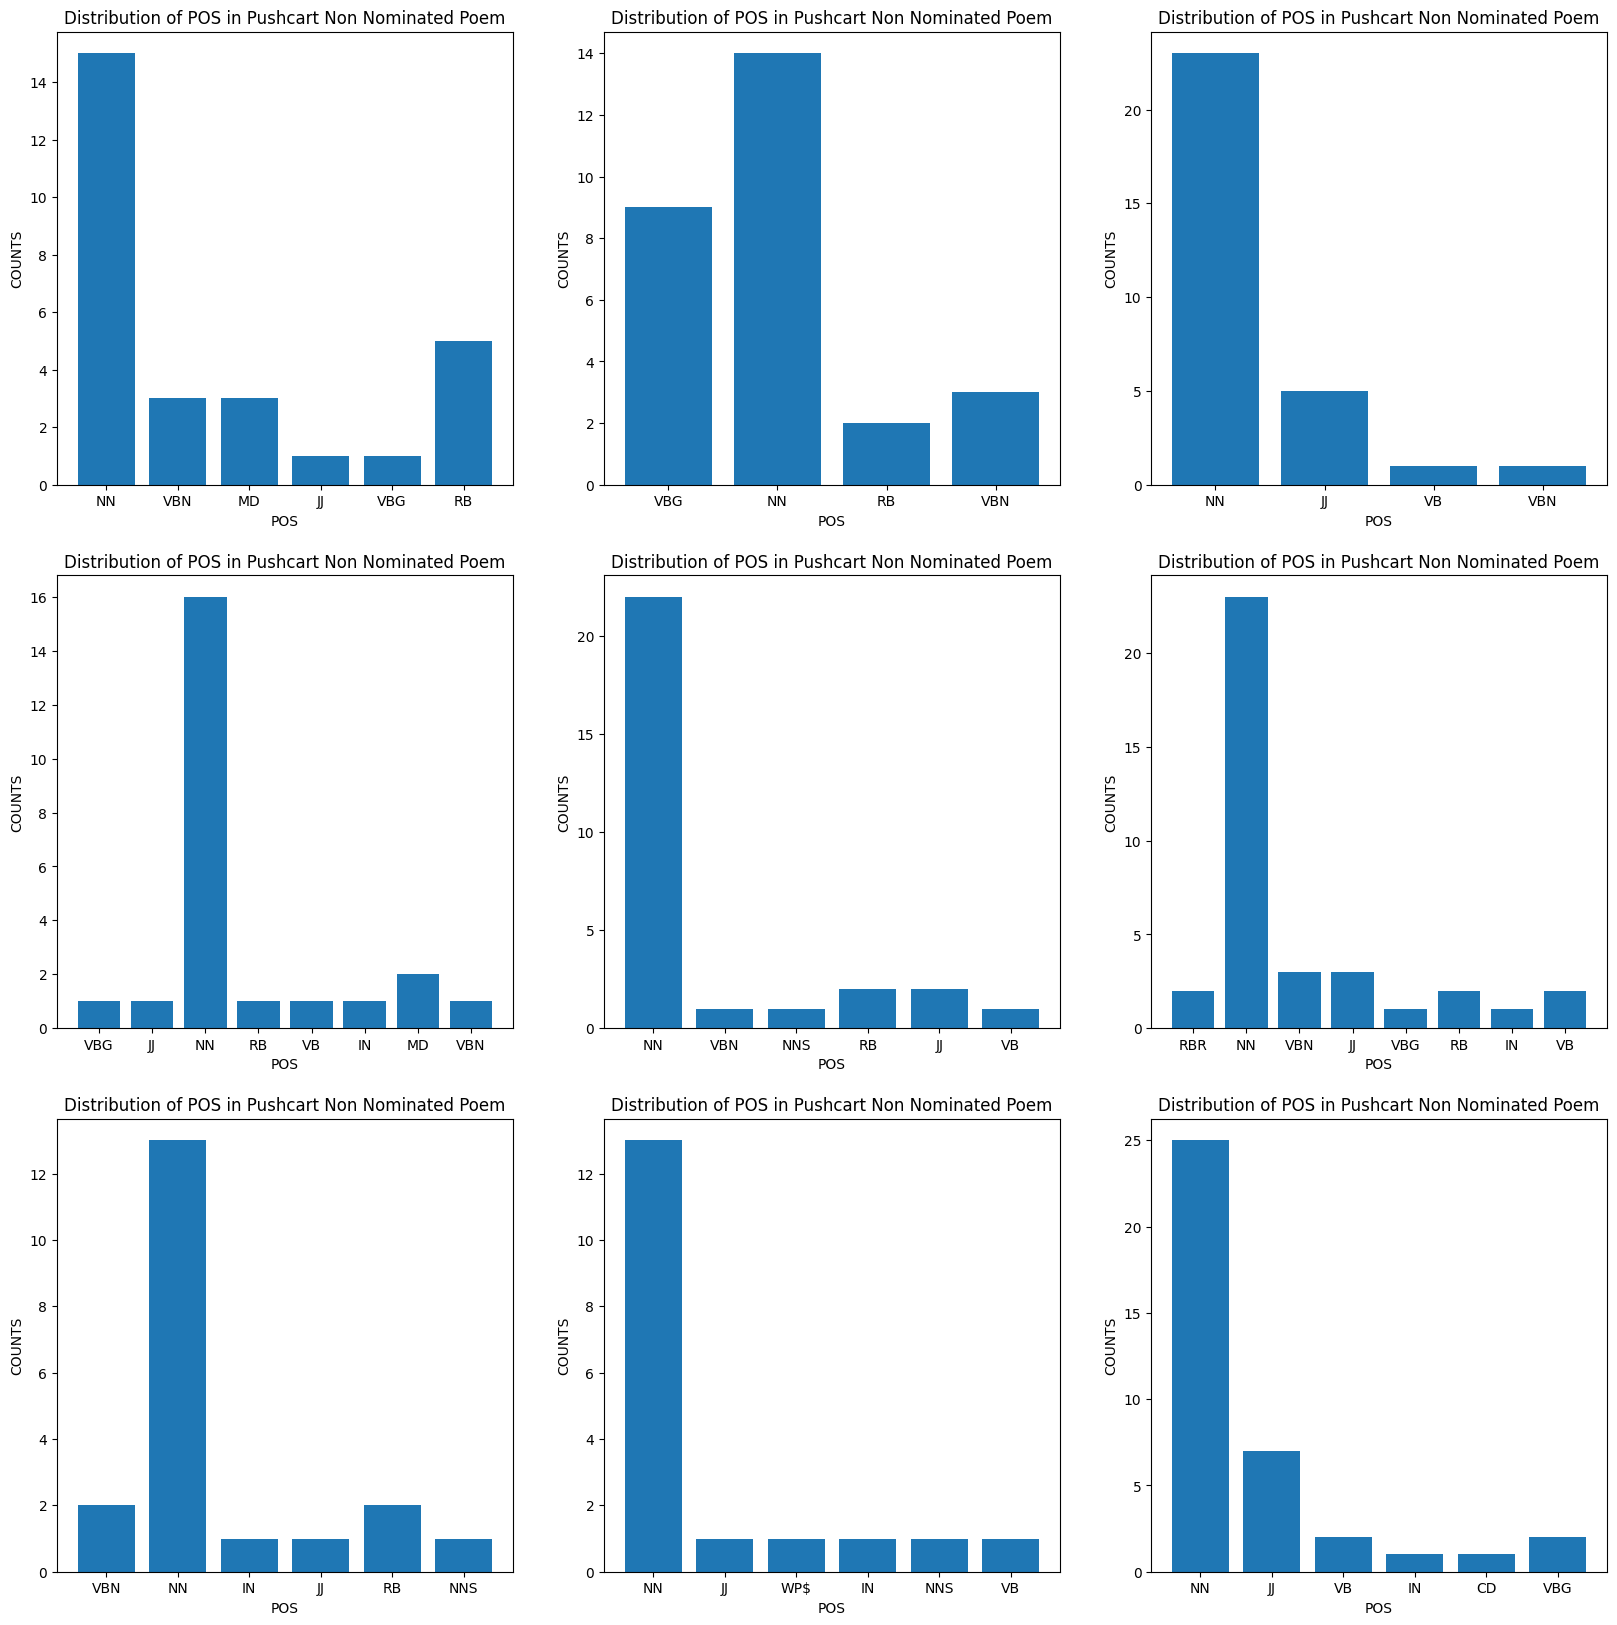

In [22]:
Image("Pushcart_Non-Nomination_DIST_POS.png")

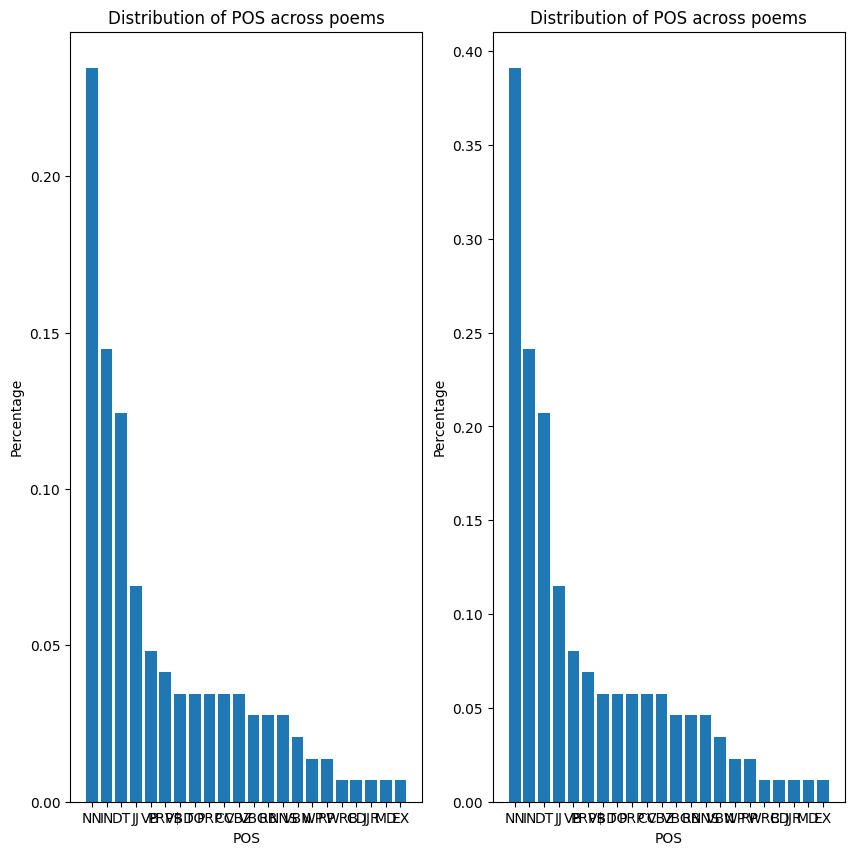

In [42]:
Image("diff_dist_pos.png")

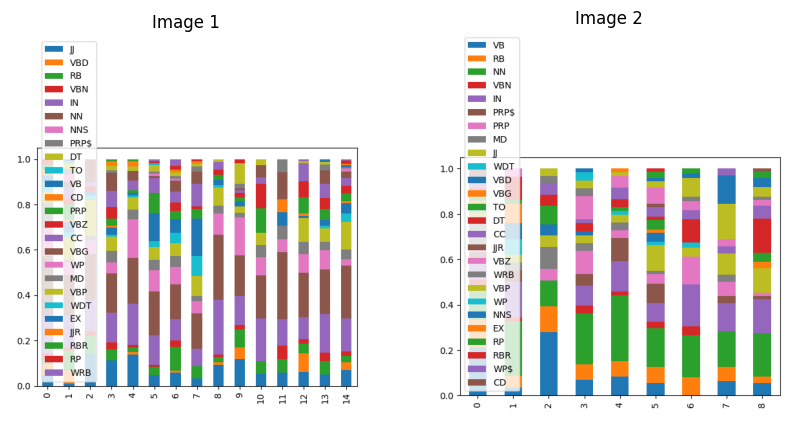

In [44]:
import matplotlib.pyplot as plt
from PIL import Image

# Load images
image1 = Image.open("superimpose.png")
image2 = Image.open("Pushcart_Non-Nomination_superimpose.png")

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Display images side by side
axs[0].imshow(image1)
axs[1].imshow(image2)

# Set titles
axs[0].set_title("Image 1")
axs[1].set_title("Image 2")

# Remove axis ticks
axs[0].axis('off')
axs[1].axis('off')

# Show plot
plt.show()

In [23]:
# Let's create a function to pull out nouns from a string of text
def nouns_adj(text):
    '''Given a string of text, tokenize the text and pull out only the nouns and adjectives.'''
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)] 
    return ' '.join(nouns_adj)

In [13]:
from sklearn.feature_extraction import text

In [25]:
poems_text_n = my_text_n = ' '.join(poems_n)
poems_text_nn = my_text_nn = ' '.join(poems_nn)

In [26]:
# Apply the nouns function to the transcripts to filter only on nouns
data_nouns_adj_n = pd.DataFrame(poems_n['Poem_for_model'].apply(nouns_adj))
data_nouns_adj_n

data_nouns_adj_nn = pd.DataFrame(poems_nn['Poem_for_model'].apply(nouns_adj))
data_nouns_adj_nn

,Poem_for_model
0,someone attire live wire peace fire liar choir...
1,star healing scar playing guitar bazaar car ja...
2,want hard rich rest money happiness money love...
3,dating much labour flavor god wish neighbor tr...
4,distance hindrance hope room ignorance admirat...
5,earlier try cry eyes dry next attempt shy stic...
6,chitta forlornness solitude place thought soli...
7,hope special kind dope sophistry sure emotions...
8,time rich season homeless struggle alive rich ...


In [27]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a new document-term matrix using only nouns and adjectives, also remove common words with max_df
cvna_n = CountVectorizer(stop_words="english")
#clean_poems = [' '.join(poem) for poem in data_nouns_adj]
data_cvna_n = cvna_n.fit_transform(data_nouns_adj_n['Poem_for_model'])
data_dtmna_n = pd.DataFrame(data_cvna_n.toarray(), columns=cvna_n.get_feature_names_out())
data_dtmna_n.index = data_nouns_adj_n['Poem_for_model'].index
data_dtmna_n

cvna_nn = CountVectorizer(stop_words="english")
#clean_poems = [' '.join(poem) for poem in data_nouns_adj]
data_cvna_nn = cvna_nn.fit_transform(data_nouns_adj_nn['Poem_for_model'])
data_dtmna_nn = pd.DataFrame(data_cvna_nn.toarray(), columns=cvna_nn.get_feature_names_out())
data_dtmna_nn.index = data_nouns_adj_nn['Poem_for_model'].index
data_dtmna_nn

,abundance,acceptance,admiration,alive,arrogance,assurance,attempt,attire,bazaar,beautifier,...,tightrope,time,traitor,try,want,winter,wire,wish,world,yes
0,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,1,1,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,0,0,0,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
8,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [28]:
# Create the gensim corpus
corpusna_n = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmna_n.transpose()))
corpusna_nn = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmna_nn.transpose()))


# Create the vocabulary dictionary
id2wordna_n = dict((v, k) for k, v in cvna_n.vocabulary_.items())
id2wordna_nn = dict((v, k) for k, v in cvna_nn.vocabulary_.items())

In [29]:
poemslist_n = poems_n['Poem_for_model'].tolist()
poemslist_nn = poems_nn['Poem_for_model'].tolist()

In [30]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim import corpora

# Load stop words and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Preprocess the poems
preprocessed_corpus_n = []
for poem in poemslist_n:
    # Tokenize the poem
    tokens = nltk.word_tokenize(poem)
    
    # Remove stop words and lemmatize words
    processed_tokens_n = [lemmatizer.lemmatize(token.lower()) for token in tokens if token.lower() not in stop_words]
    
    # Add processed tokens to preprocessed_corpus
    preprocessed_corpus_n.append(processed_tokens_n)

# Create dictionary and bag-of-words representations of poems
dictionary_n = corpora.Dictionary(preprocessed_corpus_n)
bow_corpus_n = [dictionary_n.doc2bow(poem) for poem in preprocessed_corpus_n]

# Create the document-term matrix
dtm_n = corpora.MmCorpus.serialize('dtm_corpus_n.mm', bow_corpus_n)


In [31]:
# Load stop words and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Preprocess the poems
preprocessed_corpus_nn = []
for poem in poemslist_nn:
    # Tokenize the poem
    tokens = nltk.word_tokenize(poem)
    
    # Remove stop words and lemmatize words
    processed_tokens_nn = [lemmatizer.lemmatize(token.lower()) for token in tokens if token.lower() not in stop_words]
    
    # Add processed tokens to preprocessed_corpus
    preprocessed_corpus_nn.append(processed_tokens_nn)

# Create dictionary and bag-of-words representations of poems
dictionary_nn = corpora.Dictionary(preprocessed_corpus_nn)
bow_corpus_nn = [dictionary_nn.doc2bow(poem) for poem in preprocessed_corpus_nn]

# Create the document-term matrix
dtm_nn = corpora.MmCorpus.serialize('dtm_corpus_nn.mm', bow_corpus_nn)


In [33]:
# Preprocess the poems
dictionary_n = corpora.Dictionary(preprocessed_corpus_n)
corpus_n = [dictionary_n.doc2bow(poem) for poem in preprocessed_corpus_n]

dictionary_nn = corpora.Dictionary(preprocessed_corpus_nn)
corpus_nn = [dictionary_nn.doc2bow(poem) for poem in preprocessed_corpus_nn]



In [35]:
# Let's start with 5 topics
ldana_n = models.LdaModel(corpus=corpusna_n, num_topics=5, id2word=id2wordna_n, passes=10)
ldana_n.print_topics()



[(0,
  '0.023*"notes" + 0.016*"sweet" + 0.009*"night" + 0.008*"eyes" + 0.008*"slick" + 0.008*"silver" + 0.008*"wings" + 0.008*"toxic" + 0.008*"quiver" + 0.008*"head"'),
 (1,
  '0.022*"shells" + 0.008*"macedonia" + 0.008*"square" + 0.008*"nose" + 0.008*"carefree" + 0.008*"boys" + 0.008*"cub" + 0.008*"bear" + 0.008*"louisa" + 0.008*"inverted"'),
 (2,
  '0.026*"world" + 0.013*"hearts" + 0.013*"joyful" + 0.013*"mess" + 0.013*"room" + 0.013*"feels" + 0.013*"bright" + 0.013*"skin" + 0.007*"laughter" + 0.007*"life"'),
 (3,
  '0.017*"birth" + 0.013*"pain" + 0.009*"morning" + 0.009*"window" + 0.009*"school" + 0.009*"moon" + 0.009*"death" + 0.009*"midnight" + 0.005*"ice" + 0.005*"cold"'),
 (4,
  '0.011*"world" + 0.010*"drop" + 0.010*"wings" + 0.010*"sea" + 0.010*"day" + 0.010*"wick" + 0.010*"water" + 0.010*"corpses" + 0.010*"chest" + 0.010*"oregon"')]

In [36]:
ldana_nn = models.LdaModel(corpus=corpusna_nn, num_topics=5, id2word=id2wordna_nn, passes=10)
ldana_nn.print_topics()

[(0,
  '0.039*"rich" + 0.027*"calories" + 0.027*"poor" + 0.027*"table" + 0.027*"time" + 0.015*"dreaming" + 0.015*"scar" + 0.015*"healing" + 0.015*"cedar" + 0.015*"bazaar"'),
 (1,
  '0.034*"slope" + 0.034*"downward" + 0.034*"emotions" + 0.034*"radioisotopes" + 0.034*"kind" + 0.034*"hope" + 0.034*"dope" + 0.034*"tightrope" + 0.034*"sure" + 0.034*"yes"'),
 (2,
  '0.033*"money" + 0.033*"hard" + 0.033*"want" + 0.033*"hope" + 0.033*"wish" + 0.018*"peace" + 0.018*"favor" + 0.018*"dating" + 0.018*"traitor" + 0.018*"god"'),
 (3,
  '0.090*"solitude" + 0.034*"love" + 0.034*"happiness" + 0.034*"thought" + 0.034*"intense" + 0.034*"chitta" + 0.034*"renews" + 0.034*"forlornness" + 0.034*"spring" + 0.034*"place"'),
 (4,
  '0.036*"peace" + 0.036*"attire" + 0.036*"pacifier" + 0.036*"sweetbriar" + 0.036*"choir" + 0.036*"wire" + 0.036*"beautifier" + 0.036*"liar" + 0.036*"live" + 0.036*"electrifier"')]

In [37]:
# Print the topics and their top words
for topic_num, topic_words in ldana_n.show_topics(num_topics=-1, num_words=10):
    print(f"Topic {topic_num+1}: {topic_words}")

Topic 1: 0.023*"notes" + 0.016*"sweet" + 0.009*"night" + 0.008*"eyes" + 0.008*"slick" + 0.008*"silver" + 0.008*"wings" + 0.008*"toxic" + 0.008*"quiver" + 0.008*"head"
Topic 2: 0.022*"shells" + 0.008*"macedonia" + 0.008*"square" + 0.008*"nose" + 0.008*"carefree" + 0.008*"boys" + 0.008*"cub" + 0.008*"bear" + 0.008*"louisa" + 0.008*"inverted"
Topic 3: 0.026*"world" + 0.013*"hearts" + 0.013*"joyful" + 0.013*"mess" + 0.013*"room" + 0.013*"feels" + 0.013*"bright" + 0.013*"skin" + 0.007*"laughter" + 0.007*"life"
Topic 4: 0.017*"birth" + 0.013*"pain" + 0.009*"morning" + 0.009*"window" + 0.009*"school" + 0.009*"moon" + 0.009*"death" + 0.009*"midnight" + 0.005*"ice" + 0.005*"cold"
Topic 5: 0.011*"world" + 0.010*"drop" + 0.010*"wings" + 0.010*"sea" + 0.010*"day" + 0.010*"wick" + 0.010*"water" + 0.010*"corpses" + 0.010*"chest" + 0.010*"oregon"


In [38]:
for topic_num, topic_words in ldana_nn.show_topics(num_topics=-1, num_words=10):
    print(f"Topic {topic_num+1}: {topic_words}")

Topic 1: 0.039*"rich" + 0.027*"calories" + 0.027*"poor" + 0.027*"table" + 0.027*"time" + 0.015*"dreaming" + 0.015*"scar" + 0.015*"healing" + 0.015*"cedar" + 0.015*"bazaar"
Topic 2: 0.034*"slope" + 0.034*"downward" + 0.034*"emotions" + 0.034*"radioisotopes" + 0.034*"kind" + 0.034*"hope" + 0.034*"dope" + 0.034*"tightrope" + 0.034*"sure" + 0.034*"yes"
Topic 3: 0.033*"money" + 0.033*"hard" + 0.033*"want" + 0.033*"hope" + 0.033*"wish" + 0.018*"peace" + 0.018*"favor" + 0.018*"dating" + 0.018*"traitor" + 0.018*"god"
Topic 4: 0.090*"solitude" + 0.034*"love" + 0.034*"happiness" + 0.034*"thought" + 0.034*"intense" + 0.034*"chitta" + 0.034*"renews" + 0.034*"forlornness" + 0.034*"spring" + 0.034*"place"
Topic 5: 0.036*"peace" + 0.036*"attire" + 0.036*"pacifier" + 0.036*"sweetbriar" + 0.036*"choir" + 0.036*"wire" + 0.036*"beautifier" + 0.036*"liar" + 0.036*"live" + 0.036*"electrifier"


In [40]:
from gensim.models import LdaModel

# Train an LDA model on the document-term matrix
lda_model_n = LdaModel(dtm_n, num_topics=5, id2word=dictionary_n, passes=10)

In [41]:
lda_model_nn = LdaModel(dtm_nn, num_topics=5, id2word=dictionary_nn, passes=10)

In [48]:
from nltk.sentiment import SentimentIntensityAnalyzer


In [49]:
def check_sentiment(poem):
  sid = SentimentIntensityAnalyzer()
  scores = sid.polarity_scores(poem)
  return scores

In [50]:
poems_n['sentiment'] = {}
poems_nn['sentiment'] = {}

for i in range(len(poems_n)):
  poem = poems_n['Poem_for_model'][i]
  poems_n['sentiment'][i] = check_sentiment(poem)

for i in range(len(poems_nn)):
  poem = poems_nn['Poem_for_model'][i]
  poems_nn['sentiment'][i] = check_sentiment(poem)

/tmp/ipykernel_5845/1922933415.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poems_n['sentiment'][i] = check_sentiment(poem)
/tmp/ipykernel_5845/1922933415.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poems_n['sentiment'][i] = check_sentiment(poem)
/tmp/ipykernel_5845/1922933415.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poems_n['sentiment'][i] = check_sentiment(poem)
/tmp/ipykernel_5845/1922933415.py:6: SettingWi

In [51]:
poems_nn

,Author,Title,Poem,Year,Poem_for_model,POS,dist_pos,sentiment
0,Chaitra,The Desire,Dont desire someone based on their attire;\nFo...,2020,do not desire someone based on their attire fo...,"[[[desire, NN]], [[someone, NN]], [[based, VBN...","{'NN': 15, 'VBN': 3, 'MD': 3, 'JJ': 1, 'VBG': ...","{'neg': 0.128, 'neu': 0.781, 'pos': 0.091, 'co..."
1,Chaitra,Sky-watching,"Gazing at the star which is so far,\nPraying f...",2022,gazing at the star which is so far praying for...,"[[[gazing, VBG]], [[star, NN]], [[far, RB]], [...","{'VBG': 9, 'NN': 14, 'RB': 2, 'VBN': 3}","{'neg': 0.034, 'neu': 0.787, 'pos': 0.179, 'co..."
2,Chaitra,Breathlessness,"I wanna live, I don't want to die\nBut I can't...",2021,want to live do not want to die but cannot bre...,"[[[want, NN]], [[live, JJ]], [[want, NN]], [[d...","{'NN': 23, 'JJ': 5, 'VB': 1, 'VBN': 1}","{'neg': 0.112, 'neu': 0.507, 'pos': 0.381, 'co..."
3,Chaitra,Dating,Dating is too much labour \nWhen you don't eve...,2021,dating is too much labour when you do not even...,"[[[dating, VBG]], [[much, JJ]], [[labour, NN]]...","{'VBG': 1, 'JJ': 1, 'NN': 16, 'RB': 1, 'VB': 1...","{'neg': 0.04, 'neu': 0.739, 'pos': 0.221, 'com..."
4,Chaitra,Dearest,This distance has caused hindrance \nbut hope ...,2020,this distance has caused hindrance but hope no...,"[[[distance, NN]], [[caused, VBN]], [[hindranc...","{'NN': 22, 'VBN': 1, 'NNS': 1, 'RB': 2, 'JJ': ...","{'neg': 0.173, 'neu': 0.401, 'pos': 0.426, 'co..."
5,Chaitra,Hustles of life,"My earlier try made me cry,\nWhich made my eye...",2020,my earlier try made me cry which made my eyes ...,"[[[earlier, RBR]], [[try, NN]], [[made, VBN]],...","{'RBR': 2, 'NN': 23, 'VBN': 3, 'JJ': 3, 'VBG':...","{'neg': 0.15, 'neu': 0.713, 'pos': 0.137, 'com..."
6,Chaitra,Befuddled,"Beloved Chitta,\nYou are in forlornness but\nY...",2020,beloved chitta you are in forlornness but you ...,"[[[beloved, VBN]], [[chitta, NN]], [[forlornne...","{'VBN': 2, 'NN': 13, 'IN': 1, 'JJ': 1, 'RB': 2...","{'neg': 0.041, 'neu': 0.716, 'pos': 0.243, 'co..."
7,Chaitra,Hope,"My Hope is a special kinda Dope\nHope, whose S...",2020,my hope is special kind of dope hope whose sop...,"[[[hope, NN]], [[special, JJ]], [[kind, NN]], ...","{'NN': 13, 'JJ': 1, 'WP$': 1, 'IN': 1, 'NNS': ...","{'neg': 0.036, 'neu': 0.604, 'pos': 0.36, 'com..."
8,Chaitra,Winter,The time when rich enjoy the season and homele...,2021,the time when rich enjoy the season and homele...,"[[[time, NN]], [[rich, JJ]], [[enjoy, NN]], [[...","{'NN': 25, 'JJ': 7, 'VB': 2, 'IN': 1, 'CD': 1,...","{'neg': 0.119, 'neu': 0.651, 'pos': 0.231, 'co..."


In [ ]:
def plot_dist_sentiment(dict):
  senti = list(dict.keys())
  counts = list(dict.values())

  # Create a bar plot
  plt.bar(senti, counts)
  plt.xlabel('Sentiment')
  plt.ylabel('Count')
  plt.title('Distribution of Sentiments in Pushcart NOminated Poem')
  plt.show()

In [53]:
def dist_sentiment(dict):
  senti = list(dict.keys())
  counts = list(dict.values())
  return senti, counts

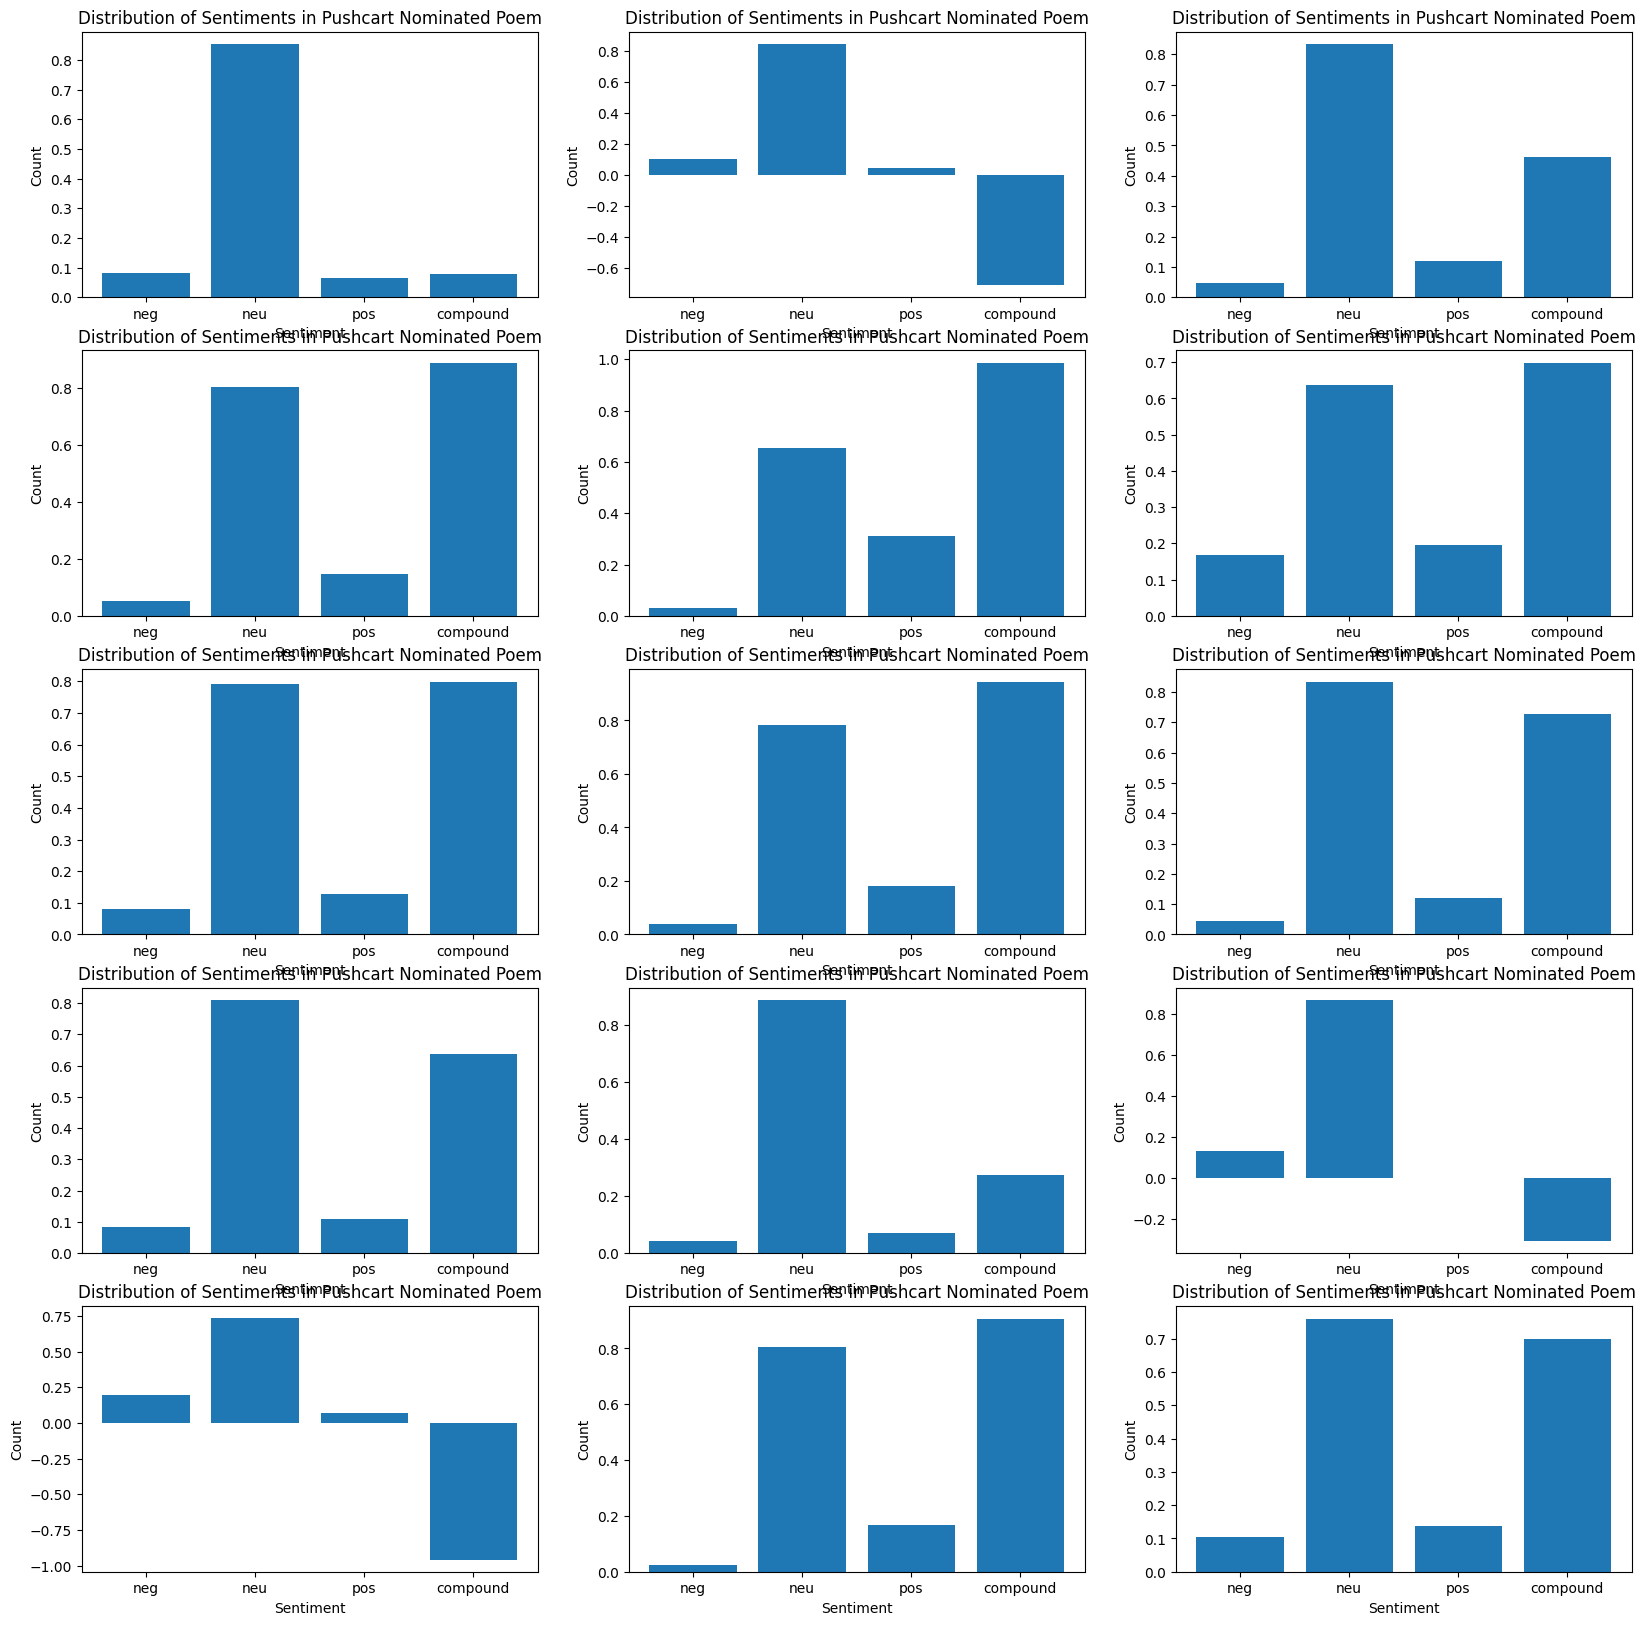

In [54]:
# Define the number of rows and columns for the plot grid
rows = 5
cols = 3

# Create the plot grid
fig, axs = plt.subplots(rows, cols, figsize=(20,20))

# Flatten the plot grid to access each subplot
axs = axs.flatten()

# Loop through the dataframe rows and plot the data points on each subplot
for i, row in poems_n.iterrows():
    x = dist_sentiment(row['sentiment'])
    axs[i].bar(x[0], x[1])

for i in range(len(axs)):
    axs[i].set_title(f"Distribution of Sentiments in Pushcart Nominated Poem")
    axs[i].set_xlabel("Sentiment")
    axs[i].set_ylabel("Count")

plt.show()

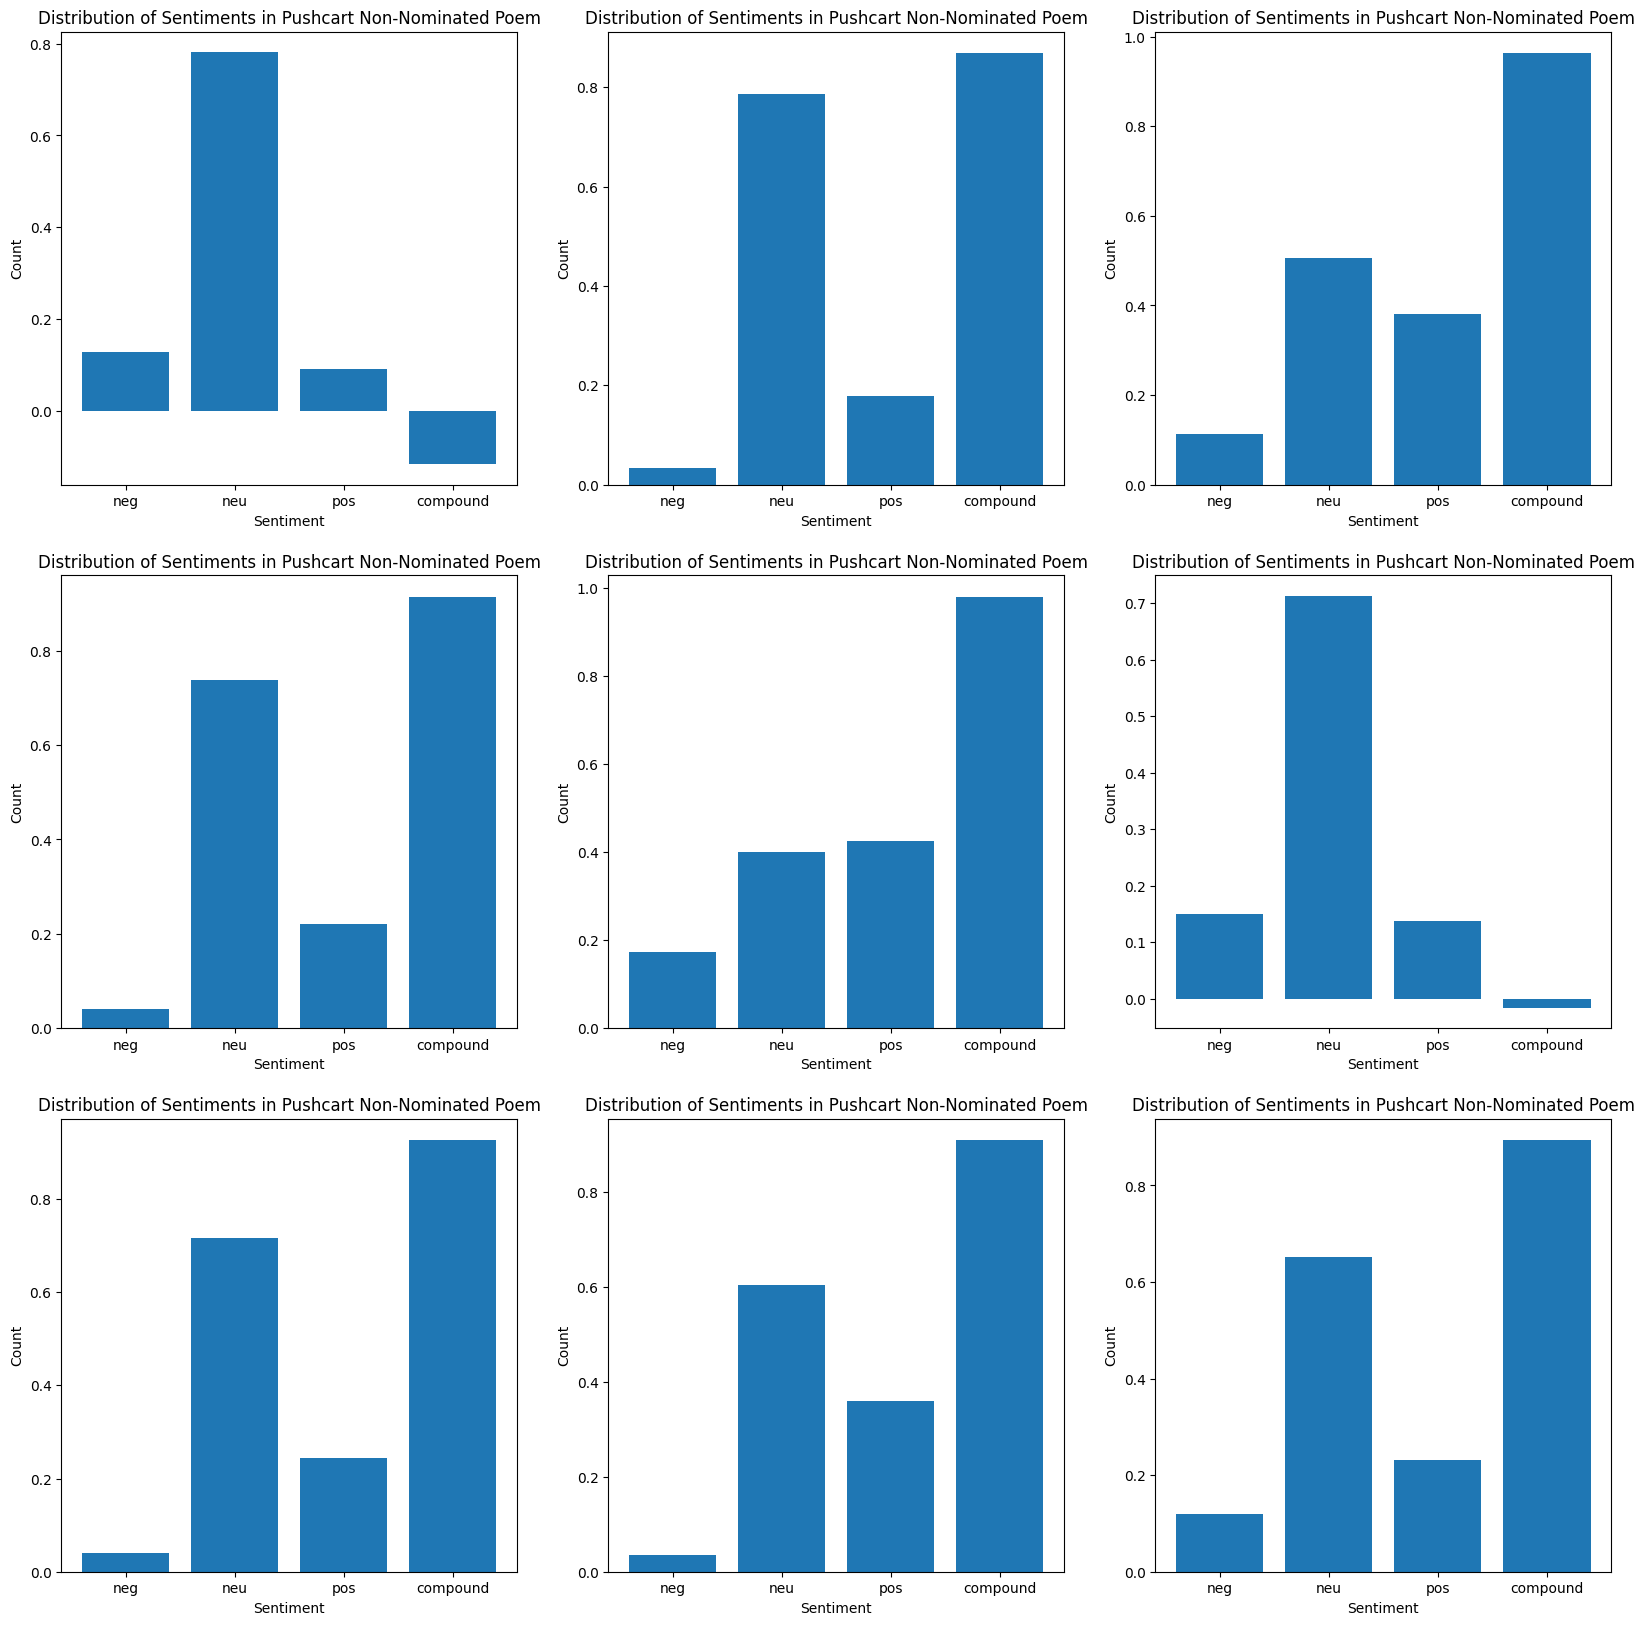

In [55]:
rows = 3
cols = 3

# Create the plot grid
fig, axs = plt.subplots(rows, cols, figsize=(20,20))

# Flatten the plot grid to access each subplot
axs = axs.flatten()

# Loop through the dataframe rows and plot the data points on each subplot
for i, row in poems_nn.iterrows():
    x = dist_sentiment(row['sentiment'])
    axs[i].bar(x[0], x[1])

for i in range(len(axs)):
    axs[i].set_title(f"Distribution of Sentiments in Pushcart Non-Nominated Poem")
    axs[i].set_xlabel("Sentiment")
    axs[i].set_ylabel("Count")

plt.show()